In [33]:
!pip install findspark

In [34]:
!pip install pyspark

In [35]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()

In [36]:
df=spark.read.csv("bdt.csv",header=True)
df.head()

Row(CustID='101', Country='USA', Sales='42000')

In [37]:
df.show();

+------+------------+-----+
|CustID|     Country|Sales|
+------+------------+-----+
|   101|         USA|42000|
|   102|      Canada|60000|
|   103|          UK|32000|
|   104|     Germany|48000|
|   105|      France|28000|
|   106|   Australia|72000|
|   107|       Japan|64000|
|   108|       Spain|20000|
|   109|       Italy|56000|
|   110|      Mexico|24000|
|   111|      Brazil|44000|
|   112|       India|76000|
|   113|       China|60000|
|   114|South Africa|16000|
|   115|      Russia|36000|
|   116|   Argentina|48000|
|   117|      Sweden|24000|
|   118|      Norway|32000|
|   119|     Denmark|28000|
|   120| Netherlands|56000|
+------+------------+-----+
only showing top 20 rows



In [38]:
df.printSchema();

root
 |-- CustID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Sales: string (nullable = true)



In [39]:
df.count()

21

In [40]:
print(df)

DataFrame[CustID: string, Country: string, Sales: string]


In [41]:
df.columns

['CustID', 'Country', 'Sales']

In [42]:
df.show(truncate=False)

+------+------------+-----+
|CustID|Country     |Sales|
+------+------------+-----+
|101   |USA         |42000|
|102   |Canada      |60000|
|103   |UK          |32000|
|104   |Germany     |48000|
|105   |France      |28000|
|106   |Australia   |72000|
|107   |Japan       |64000|
|108   |Spain       |20000|
|109   |Italy       |56000|
|110   |Mexico      |24000|
|111   |Brazil      |44000|
|112   |India       |76000|
|113   |China       |60000|
|114   |South Africa|16000|
|115   |Russia      |36000|
|116   |Argentina   |48000|
|117   |Sweden      |24000|
|118   |Norway      |32000|
|119   |Denmark     |28000|
|120   |Netherlands |56000|
+------+------------+-----+
only showing top 20 rows



In [43]:
df.describe()

DataFrame[summary: string, CustID: string, Country: string, Sales: string]

In [44]:
df.select('country').distinct().show()

+------------+
|     country|
+------------+
|      Russia|
|      Sweden|
|     Germany|
|      France|
|   Argentina|
|       India|
|       China|
|       Italy|
|      Norway|
|       Spain|
|     Denmark|
|         USA|
|      Mexico|
|          UK|
|      Canada|
|      Brazil|
|       Japan|
|   Australia|
|South Africa|
| Netherlands|
+------------+



In [45]:
df=df.na.fill('0')
df.show()

+------+------------+-----+
|CustID|     Country|Sales|
+------+------------+-----+
|   101|         USA|42000|
|   102|      Canada|60000|
|   103|          UK|32000|
|   104|     Germany|48000|
|   105|      France|28000|
|   106|   Australia|72000|
|   107|       Japan|64000|
|   108|       Spain|20000|
|   109|       Italy|56000|
|   110|      Mexico|24000|
|   111|      Brazil|44000|
|   112|       India|76000|
|   113|       China|60000|
|   114|South Africa|16000|
|   115|      Russia|36000|
|   116|   Argentina|48000|
|   117|      Sweden|24000|
|   118|      Norway|32000|
|   119|     Denmark|28000|
|   120| Netherlands|56000|
+------+------------+-----+
only showing top 20 rows



In [46]:
df.groupby('country').count().show()

+------------+-----+
|     country|count|
+------------+-----+
|      Russia|    1|
|      Sweden|    1|
|     Germany|    1|
|      France|    1|
|   Argentina|    1|
|       India|    1|
|       China|    1|
|       Italy|    1|
|      Norway|    1|
|       Spain|    1|
|     Denmark|    1|
|         USA|    2|
|      Mexico|    1|
|          UK|    1|
|      Canada|    1|
|      Brazil|    1|
|       Japan|    1|
|   Australia|    1|
|South Africa|    1|
| Netherlands|    1|
+------------+-----+



In [47]:
dfs=df.groupby('custid').agg({'sales':'avg'})
dfs.show()

+------+----------+
|custid|avg(sales)|
+------+----------+
|   101|   42000.0|
|   112|   76000.0|
|   113|   60000.0|
|   107|   64000.0|
|   110|   24000.0|
|   120|   56000.0|
|   118|   32000.0|
|   104|   48000.0|
|   102|   60000.0|
|   111|   44000.0|
|   103|   32000.0|
|   115|   36000.0|
|   108|   20000.0|
|   117|   24000.0|
|   114|   16000.0|
|   106|   72000.0|
|   116|   48000.0|
|   105|   28000.0|
|   121|   12000.0|
|   109|   56000.0|
+------+----------+
only showing top 20 rows



In [48]:
dfs=dfs.toPandas()

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

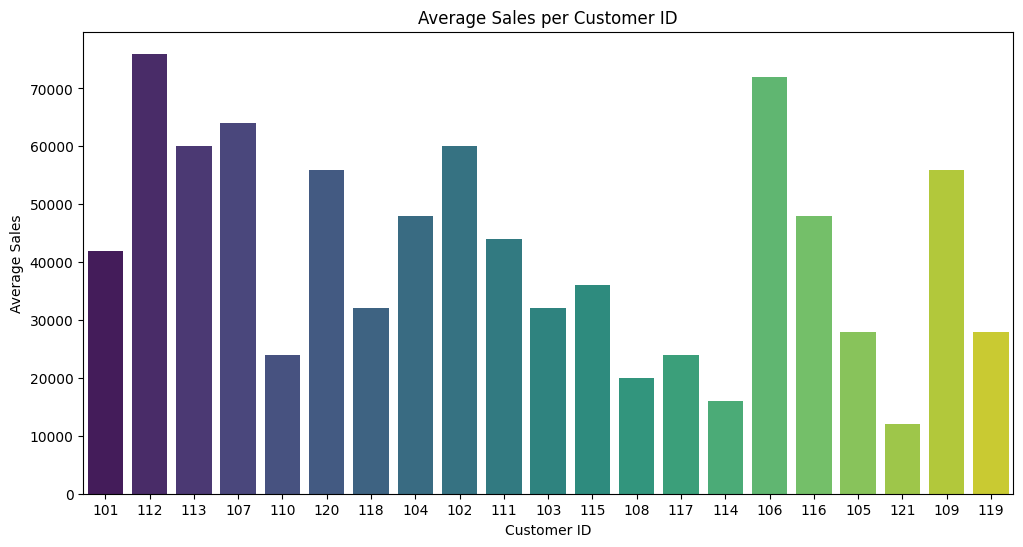

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='custid', y='avg(sales)', data=dfs, palette='viridis')
plt.title('Average Sales per Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Average Sales')
plt.show()

In [51]:
data=df.groupby('country').agg({'sales':'avg'})
data.show()

+------------+----------+
|     country|avg(sales)|
+------------+----------+
|      Russia|   36000.0|
|      Sweden|   24000.0|
|     Germany|   48000.0|
|      France|   28000.0|
|   Argentina|   48000.0|
|       India|   76000.0|
|       China|   60000.0|
|       Italy|   56000.0|
|      Norway|   32000.0|
|       Spain|   20000.0|
|     Denmark|   28000.0|
|         USA|   27000.0|
|      Mexico|   24000.0|
|          UK|   32000.0|
|      Canada|   60000.0|
|      Brazil|   44000.0|
|       Japan|   64000.0|
|   Australia|   72000.0|
|South Africa|   16000.0|
| Netherlands|   56000.0|
+------------+----------+



In [52]:
data=data.toPandas()

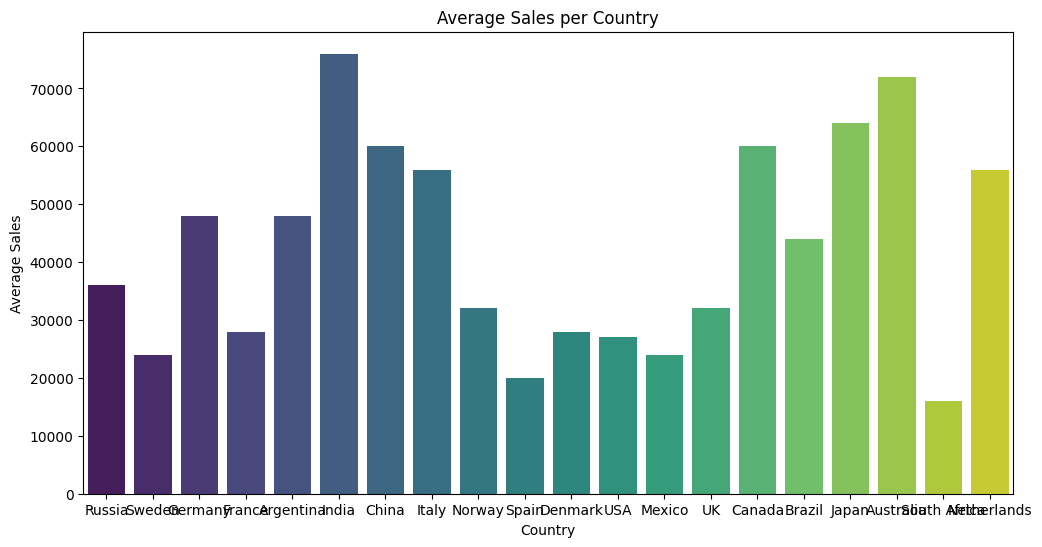

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='avg(sales)', data=data, palette='viridis')
plt.title('Average Sales per Country')
plt.xlabel('Country')
 plt.ylabel('Average Sales')
plt.show()